# Homework 1: Applied Machine Learning - Linear | Logisitc | SVM

## Name - Aayush Kumar Verma
## UNI - av2955

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [56]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [57]:
pd.options.mode.chained_assignment = None

#**Part 1: Linear Regression**

In part 1, we will use **two datasets** to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:
   
**𝜖 ∼ Normal(0,3**)

**z = 3𝑥 + 10y + 10 + 𝜖**

In [58]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
y = np.linspace(0, 5, 100)
z = 3 * x + 10 * y + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

- Linearity: $y$ is a linear (technically affine) function of $x$.
- Independence: the $x$'s are independently drawn, and not dependent on each other.
- Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
- Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**1.1. Plot z vs x and z vs y in the synthetic dataset as scatter plots. Label your axes and make sure your y-axis starts from 0. Do the independent and dependent features have linear relationship?**

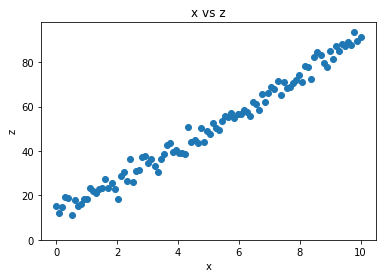

In [59]:
### Your code here

f, ax = plt.subplots(1)
plt.scatter (x,z)
ax.set_ylim (ymin=0)
plt.title ("x vs z")
plt.xlabel ("x")
plt.ylabel ("z")
plt.show (f)

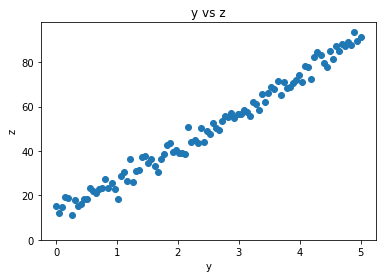

In [60]:
### Your code here

f, ax = plt.subplots(1)
plt.scatter (y,z)
ax.set_ylim (ymin=0)
plt.title ("y vs z")
plt.xlabel ("y")
plt.ylabel ("z")
plt.show (f)

### Do the independent and dependent features have a linear relationship?

### YES, as seen from the above plots

**1.2. Are the independent variables correlated? Use pearson correlation to verify? What would be the problem if linear regression is applied to correlated features?**

In [61]:
### Your code here

np.corrcoef (x, y)

array([[1., 1.],
       [1., 1.]])

### Are the independent variables correlated? What would be the problem if linear regression is applied to correlated features?

### From the values of the pearson coefficient (pearson coefficient = +1), it can be seen that the features have a strong correlation. When the independent features are correlated, any small change in one variable will cause a change in the other making it difficult for the model to estimate the relation between independent variables thereby leading to inaccurate coefficient estimates and hence we will not get a good model. 


**The second dataset we will be using is an auto MPG dataset. This dataset contains various characteristics for around 8128 cars. We will use linear regression to predict the selling_price label**

In [62]:
auto_mpg_df = pd.read_csv('Car details v3.csv')
# Dropping Torque column, there is information in this column but it will take some preprocessing.
# The idea of the exercise is to familarize yourself with the basics of Linear regression.
auto_mpg_df = auto_mpg_df.drop(['torque'], axis = 1)

In [63]:
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.3. Missing Value analysis - Auto mpg dataset.**

**Are there any missing values in the dataset? If so, what can be done about it? Jusify your approach.**

In [64]:
### Your code here
auto_mpg_df.isnull().sum()

### Remove the rows with nulls

#auto_mpg_df = auto_mpg_df.dropna()
#auto_mpg_df

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

### There are just 878 missing values in 4 columns altogether which is <<< total number of values. Hence, we can drop these rows. 

In [65]:
auto_mpg_df = auto_mpg_df.dropna()
auto_mpg_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


**1.4. The features engine, max_power and mileage have units in the dataset. In the real world if we have such datasets, we generally remove the units from each feature. After doing so, convert the datatype of these columns to float. For example: 1248 CC engine is 1248, 23.4 kmpl is 23.4 and so on.**

**Hint: Check for distinct units in each of these features. A feature might have multiple units as well. Also, a feature could have no value but have unit. For example 'CC' without any value. Remove such rows.**

In [66]:
### Your code here
auto_mpg_df['mileage'] = auto_mpg_df['mileage'].str.split(" ", expand = True)[0]
auto_mpg_df['mileage'] = pd.to_numeric(auto_mpg_df['mileage'], downcast="float")
auto_mpg_df['mileage']

0       23.400000
1       21.139999
2       17.700001
3       23.000000
4       16.100000
          ...    
8123    18.500000
8124    16.799999
8125    19.299999
8126    23.570000
8127    23.570000
Name: mileage, Length: 7907, dtype: float32

In [67]:
auto_mpg_df['max_power'] = auto_mpg_df['max_power'].str.split(" ", expand = True)[0]
auto_mpg_df['max_power'] = pd.to_numeric(auto_mpg_df['max_power'], downcast="float")
auto_mpg_df['max_power']

0        74.000000
1       103.519997
2        78.000000
3        90.000000
4        88.199997
           ...    
8123     82.849998
8124    110.000000
8125     73.900002
8126     70.000000
8127     70.000000
Name: max_power, Length: 7907, dtype: float32

In [68]:
auto_mpg_df['engine'] = auto_mpg_df['engine'].str.split(" ", expand = True)[0]
auto_mpg_df['engine'] = pd.to_numeric(auto_mpg_df['engine'], downcast="float")
auto_mpg_df['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 7907, dtype: float32

In [69]:
auto_mpg_X = auto_mpg_df.drop(columns=['selling_price'])
auto_mpg_y = auto_mpg_df['selling_price']

**1.5. Plot the distribution of the label (selling_price) using a histogram. Make multiple plots with different binwidths. Make sure to label your axes while plotting.**

Text(0, 0.5, 'Frequency')

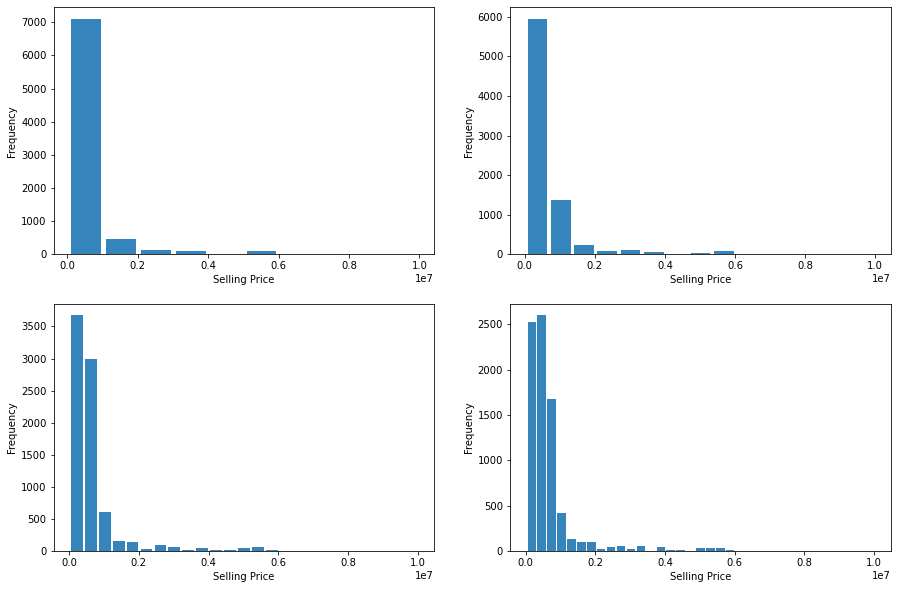

In [262]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
ax1.hist(auto_mpg_y, bins = 10, linewidth=0.5, alpha = 0.9, rwidth=0.85)
ax1.set_xlabel("Selling Price")
ax1.set_ylabel("Frequency")

ax2.hist(auto_mpg_y, bins = 15 , linewidth=0.5, alpha = 0.9, rwidth=0.85)
ax2.set_xlabel("Selling Price")
ax2.set_ylabel("Frequency")

ax3.hist(auto_mpg_y, bins = 25 , linewidth=0.5, alpha = 0.9, rwidth=0.85)
ax3.set_xlabel("Selling Price")
ax3.set_ylabel("Frequency")

ax4.hist(auto_mpg_y, bins = 35 , linewidth=0.3, alpha = 0.9, rwidth=0.85)
ax4.set_xlabel("Selling Price")
ax4.set_ylabel("Frequency")

**1.6. Plot the relationships between the label (Selling Price) and the continuous features (Mileage, km driven, engine, max power) using a small multiple of scatter plots. 
Make sure to label the axes. Do you see something interesting about the distributions of these features.**

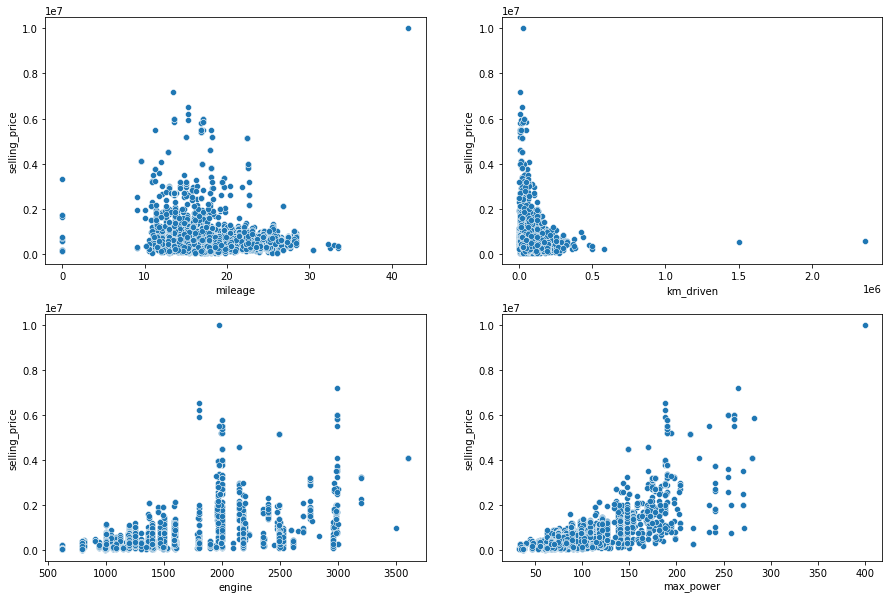

In [254]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
for var, subplot in zip(['mileage', 'km_driven', 'engine', 'max_power'], ax.flatten()):
    sns.scatterplot(x=var, y=auto_mpg_y, data=auto_mpg_X, ax=subplot)

### We find that max_power and selling price have a linear relationship.  Same goes with Engine and selling price. Km_driven vs. Selling price - when the numbner of km driven is less, the selling price is more. 

**1.7. Plot the relationships between the label (Selling Price) and the discrete features (fuel type, Seller type, transmission) using a small multiple of box plots. Make sure to label the axes.**

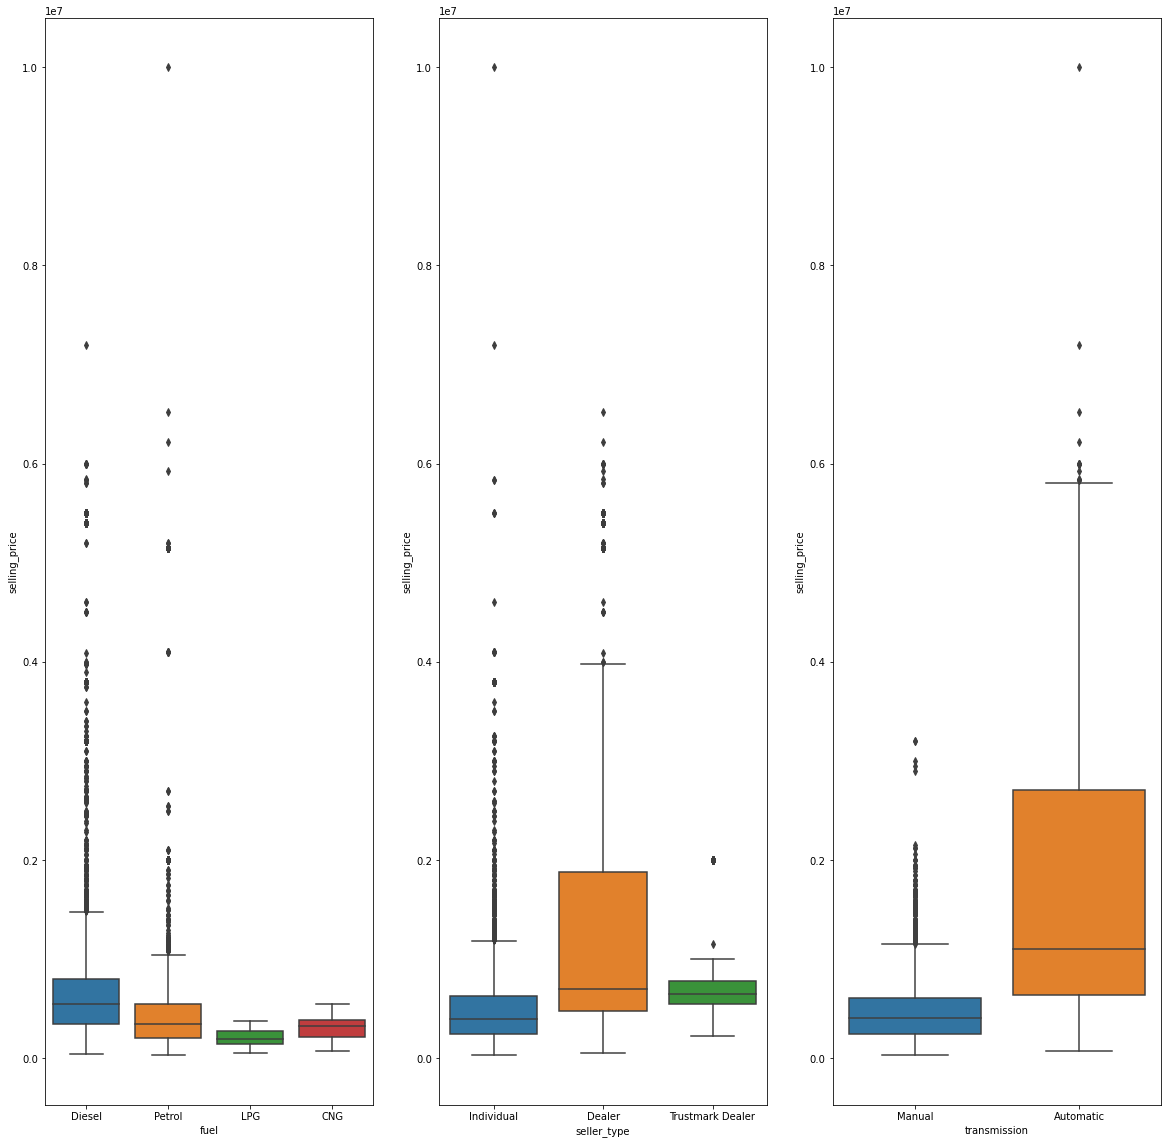

In [259]:
data = ['fuel', 'seller_type', 'transmission']
fig, ax = plt.subplots(1,3, figsize = (20,20))
for var, subplot in zip(data, ax.flatten()):
    sns.boxplot(x = var, y = auto_mpg_y, data = auto_mpg_X, ax = subplot)

**1.8. From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not?**

### Linear Regression may not be the best for outliers as shown here by the box plots. Scatter plots show a non-linear relationship between the features and linear regression will not be able to capture them. Therefore, Linear Regression is not a very good option.
 

In [82]:
auto_mpg_X['year'] =  2020 - auto_mpg_X['year']

In [83]:
#dropping the car name as it is irrelevant.
auto_mpg_X.drop(['name'],axis = 1,inplace=True)

#check out the dataset with new changes
auto_mpg_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,6,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,5.0
1,6,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,5.0
2,14,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,5.0
3,10,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,5.0
4,13,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,5.0


**Data Pre-processing**

**1.9.
Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:**
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [104]:
auto_mpg_X.dtypes

year              int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
mileage         float32
engine          float32
max_power       float32
seats           float64
dtype: object

In [120]:
# 1. No categorical features in the synthetic dataset (skip this step)
auto_mpg_x = pd.get_dummies (auto_mpg_X, dummy_na = False)
# auto_mpg_x = auto_mpg_X

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_x_dev, auto_mpg_x_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_x, auto_mpg_y, test_size = 0.2, random_state = 0)
auto_mpg_x_train, auto_mpg_x_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_x_dev, auto_mpg_y_dev, test_size = 0.25, random_state = 0)
auto_mpg_x_train = np.nan_to_num(auto_mpg_x_train)

# 3. Standardize the columns in the feature matrices
std_scl = StandardScaler()
auto_mpg_x_train = std_scl.fit_transform(auto_mpg_x_train)
auto_mpg_x_val = std_scl.transform(auto_mpg_x_val)
auto_mpg_x_test = std_scl.transform(auto_mpg_x_test)

# 4. Add a column of ones to the feature matrices
auto_mpg_x_train = np.hstack([np.ones((auto_mpg_x_train.shape[0], 1)), auto_mpg_x_train])
auto_mpg_x_val = np.hstack([np.ones((auto_mpg_x_val.shape[0], 1)), auto_mpg_x_val])
auto_mpg_x_test = np.hstack([np.ones((auto_mpg_x_test.shape[0], 1)), auto_mpg_x_test])

# np.sum(np.isnan(auto_mpg_x_train))
# auto_mpg_x_train[1]

**At the end of this pre-processing, you should have the following vectors and matrices:**

**- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test**

**Implement Linear Regression**

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**1.10. Implement a `LinearRegression` class with two methods: `train` and `predict`. You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [121]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        
        m = np.shape(X)[0]
        n = np.shape(X)[1]
        self.w = np.linalg.inv(X.T@X + self.alpha * np.identity(n))@X.T@y
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        
        y_pred = X@self.w
        return y_pred

**Train, Evaluate, and Interpret Linear Regression Model**

**1.11. A) Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 5 predictions on the test set, along with the actual labels.**

In [122]:
auto_mpg_x_train
# auto_mpg_X_train.shape


array([[ 1.        , -0.0222365 , -0.58751752, ..., -0.5852223 ,
        -0.03248534, -0.2676233 ],
       [ 1.        ,  1.00421333,  0.80353529, ...,  1.70875238,
        -0.03248534, -0.2676233 ],
       [ 1.        ,  0.49098842,  0.77140936, ...,  1.70875238,
        -0.03248534, -0.2676233 ],
       ...,
       [ 1.        ,  1.51743825,  0.64290563, ...,  1.70875238,
        -0.03248534, -0.2676233 ],
       [ 1.        , -0.79207388,  0.64290563, ..., -0.5852223 ,
        -0.03248534, -0.2676233 ],
       [ 1.        , -0.79207388, -0.88307609, ..., -0.5852223 ,
        -0.03248534, -0.2676233 ]])

In [125]:
### Your code here
linearRegression = LinearRegression(0)
linearRegression.train(auto_mpg_x_train, auto_mpg_y_train)

train_pred = linearRegression.predict(auto_mpg_x_train)
val_pred = linearRegression.predict(auto_mpg_x_val)
test_pred = linearRegression.predict(auto_mpg_x_test)

train_mse = np.mean((train_pred - auto_mpg_y_train)**2)
val_mse = np.mean((val_pred - auto_mpg_y_val)**2)
test_mse = np.mean((test_pred - auto_mpg_y_test)**2)

print("train_mse: ", train_mse)
print("val_mse: ", val_mse)
print("test_mse: ", test_mse)

print("Predicted labels first 5 test data: ", test_pred[:5])
print("Actual test labels: ", auto_mpg_y_test[:5].tolist())


train_mse:  237257579674.50153
val_mse:  237967002058.94946
test_mse:  227227491753.3001
Predicted labels first 5 test data:  [ 596686.66991405 1426830.52790374  259975.248656    851450.19161659
  615302.54941427]
Actual test labels:  [430000, 779000, 380000, 800000, 390000]


**B) As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.**

In [126]:
### Your code here
train_pred = np.mean(auto_mpg_y_train)*np.ones_like(auto_mpg_y_train)
val_pred = np.mean(auto_mpg_y_val)*np.ones_like(auto_mpg_y_val)
test_pred = np.mean(auto_mpg_y_test)*np.ones_like(auto_mpg_y_test)

train_mse = np.mean((train_pred - auto_mpg_y_train)**2)
val_mse = np.mean((val_pred - auto_mpg_y_val)**2)
test_mse = np.mean((test_pred - auto_mpg_y_test)**2)

print("train_mse: ", train_mse)
print("val_mse: ", val_mse)
print("test_mse: ", test_mse)

train_mse:  663700223604.3035
val_mse:  691331171332.7614
test_mse:  626501337374.4302


**1.12. Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! Use lecture 3, slide 15 as a reference. According to your model, which features are the greatest contributors to the selling price**

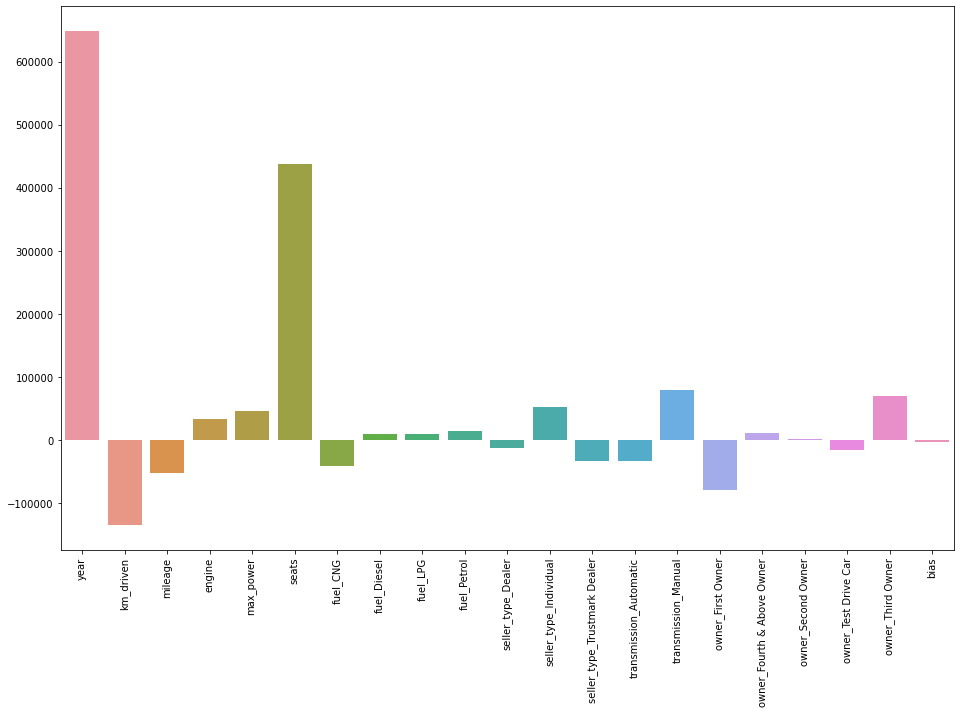

In [165]:
### Your code here

features = auto_mpg_x
features['bias'] = 1
feature_array = features.columns.to_numpy()
# print(feature_array)
# print (features)
fig = plt.figure(figsize = (16,10))
ax = sns.barplot(x=feature_array, y=linearRegression.w)
ax.tick_params(axis='x',rotation=90)

### Year and Seat contribute most to the selling price

**Tune Regularization Parameter $\alpha$**

**Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.**

**1.13. Sweep out values for $\alpha$ using `alphas = np.logspace(-2, 1, 10)`. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.**

alphas:  [ 0.01        0.02154435  0.04641589  0.1         0.21544347  0.46415888
  1.          2.15443469  4.64158883 10.        ]
train_mses:  [213628885937.2215, 213628885951.21136, 213628886016.15103, 213628886317.54764, 213628887716.2873, 213628894206.4568, 213628924309.1405, 213629063813.97122, 213629709158.30716, 213632683097.40305]
val_mses:  [200957524779.36935, 200957790938.78088, 200958364395.8781, 200959599975.09348, 200962262429.2601, 200968000732.58423, 200980373823.8256, 201007078486.27478, 201064831853.15314, 201190266357.56522]


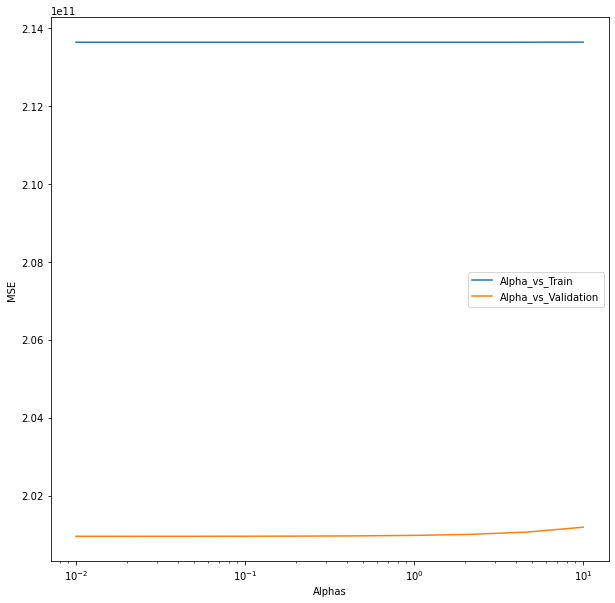

In [231]:
### Your code here

alphas = np.logspace(-2, 1, 10)
train_mses = []
val_mses = []

for alpha in alphas:
    linearRegression = LinearRegression(alpha)
    linearRegression.train(auto_mpg_x_train, auto_mpg_y_train)

    train_pred = linearRegression.predict(auto_mpg_x_train)
    val_pred = linearRegression.predict(auto_mpg_x_val)
    
    train_mse = np.mean((train_pred - auto_mpg_y_train)**2)
    val_mse = np.mean((val_pred - auto_mpg_y_val)**2)

    train_mses.append(train_mse)
    val_mses.append(val_mse)

print("alphas: ", alphas)
print("train_mses: ", train_mses)
print("val_mses: ", val_mses)

## TODO: 2-plot alphas on x axis

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
plt.plot(alphas, train_mses, label = "Alpha_vs_Train")
plt.plot(alphas, val_mses, label = "Alpha_vs_Validation")
ax.set_xlabel("log")
plt.xscale("log")
plt.xlabel("Alphas")
plt.ylabel("MSE")
plt.legend()

**Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?**

### Your answer here

### Training and Validation MSE increases with an increase in the value of alpha. THE ONE WITH MINIMUM VALUE OF MSE = good alpha, so pick the alpha just when validation MSE starts to rise.

**1.14. Using the $\alpha$ which gave the best validation MSE above, train a model on the training set. Report the value of $\alpha$ and its training, validation, and test MSE. This is the final tuned model which you would deploy in production.**

In [200]:
### Your code here
optimal_aplha = alphas[np.argmin(val_mses)]
print("Optimal alpha = ", optimal_aplha)
linearRegression = LinearRegression(optimal_aplha)
linearRegression.train(auto_mpg_x_train, auto_mpg_y_train)

train_pred = linearRegression.predict(auto_mpg_x_train)
val_pred = linearRegression.predict(auto_mpg_x_val)
test_pred = linearRegression.predict(auto_mpg_x_test)

train_mse = np.mean((train_pred - auto_mpg_y_train)**2)
val_mse = np.mean((val_pred - auto_mpg_y_val)**2)
test_mse = np.mean((test_pred - auto_mpg_y_test)**2)

print("train_mse: ", train_mse)
print("val_mse: ", val_mse)
print("test_mse: ", test_mse)


Optimal alpha =  0.01
train_mse:  213628885937.2215
val_mse:  200957524779.36935
test_mse:  204643400463.21915


# **Part 2: Logistic Regression**

**Gender Recognition by Voice and Speech Analysis**

**This dataset is used to identify a voice as male or female, based upon acoustic properties of the voice and speech.**

In [201]:
voice_df = pd.read_csv("voice-classification.csv")
voice_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Data - Checking Rows & Columns**

In [202]:
#Number of Rows & Columns
print(voice_df.shape) 

(3168, 21)


**2.1 What is the probability of observing different  categories in the Label feature of the dataset?**

This is mainly to check class imbalance in the dataset, and to apply different techniques to balance the dataset, which we will learn later.

In [203]:
#code here
counts = voice_df.value_counts('label')
males_prob = counts['male'] / (counts['male'] + counts['female'])
females_prob = counts['female'] / (counts['male'] + counts['female'])
print ("Prob. of male = ", males_prob)
print ("Prob. of female = ", females_prob)

Prob. of male =  0.5
Prob. of female =  0.5


In [205]:
voice_x = voice_df.drop(columns=['label'])
voice_y = voice_df['label']

**2.2 Plot the relationships between the label and the 20 numerical features using a small multiple of box plots. Make sure to label the axes. What useful information do this plot provide?**

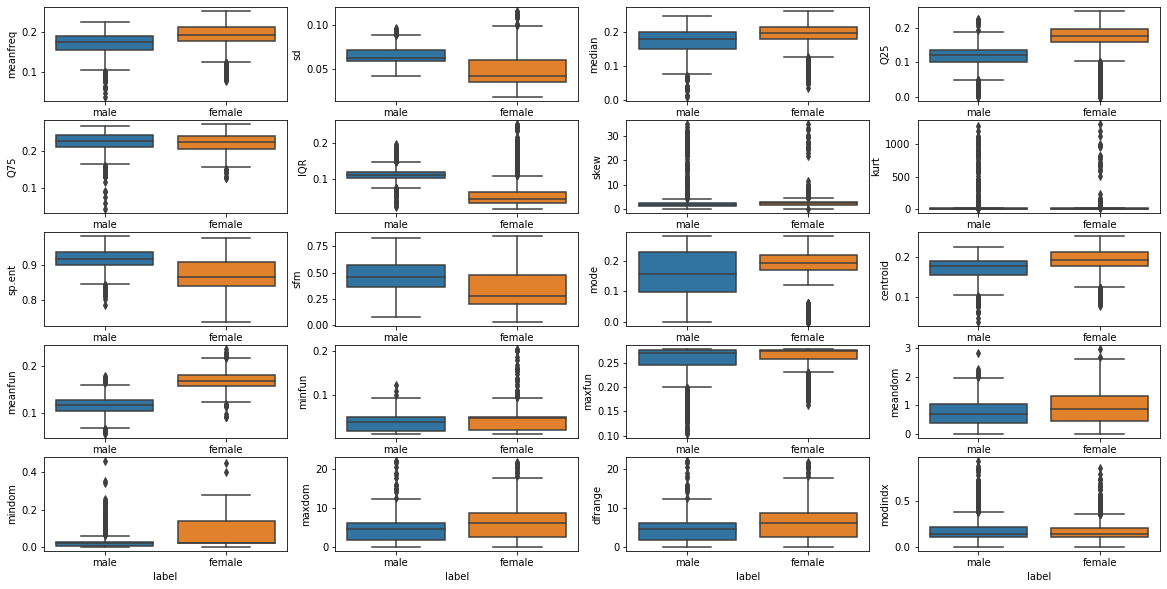

In [211]:
#code here
axes = voice_df.columns.to_numpy()
fig, ax = plt.subplots(5, 4, figsize = (20,10))
for var, subplot in zip(axes, ax.flatten()):
    sns.boxplot(x = voice_y, y = var, data = voice_x, ax = subplot)

**2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

<ipython-input-215-6733f78f17df>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  top_left = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


Dropped Features =  ['median', 'Q25', 'kurt', 'centroid', 'dfrange']


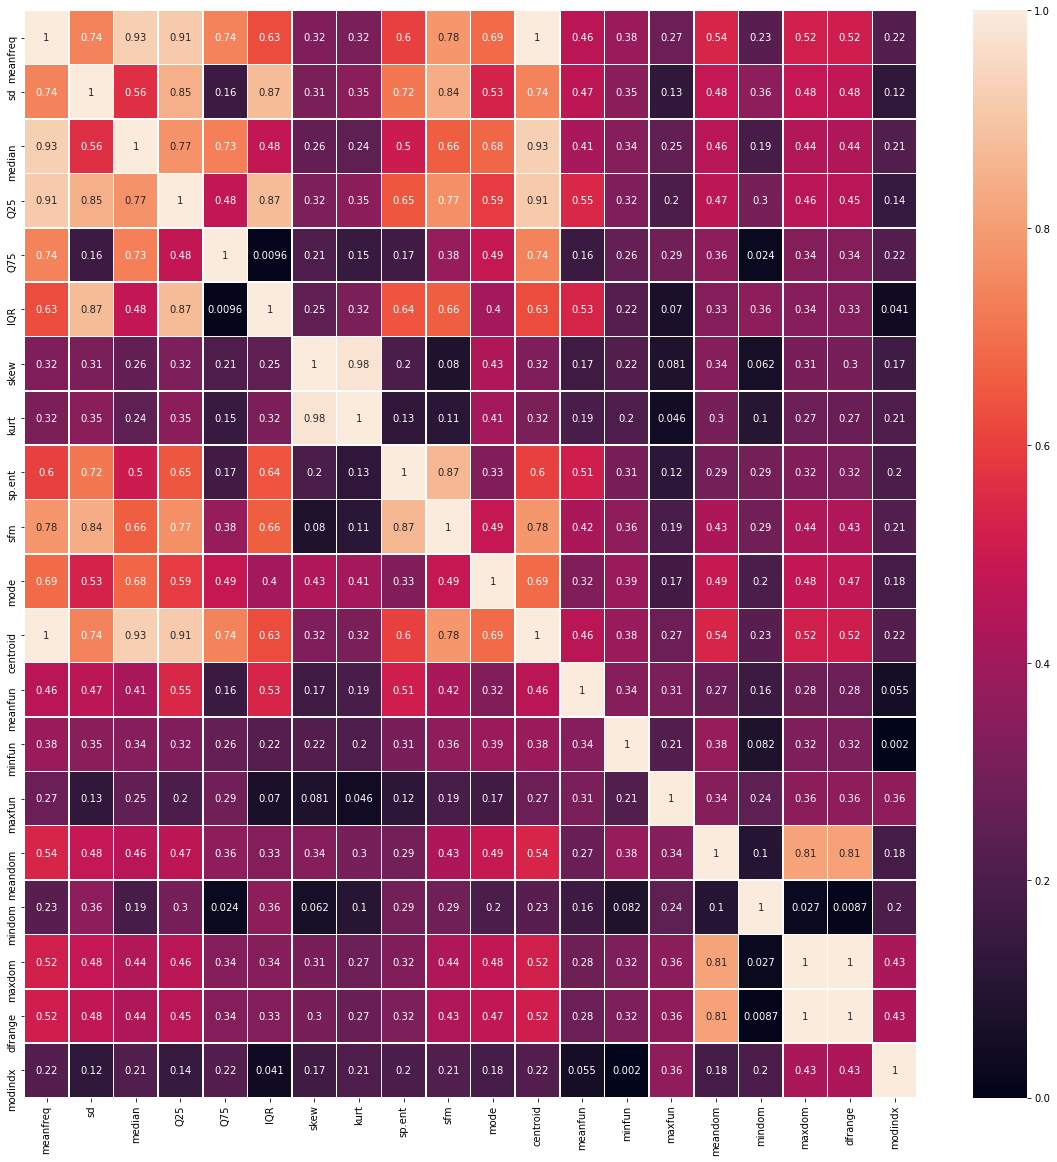

In [215]:
#code here
corr_mat = voice_df.corr().abs()
top_left = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool)) 
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, annot= True, vmin= 0, linewidth=0.5)
dropped_features = [feature for feature in top_left.columns if any(top_left[feature] > 0.90)]
print("Dropped Features = ", dropped_features)
voice_df1 = voice_df.drop(dropped_features, axis=1)

**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [216]:
# Split data into features and labels
voice_X = voice_df1.drop(columns=['label']) #replace "voice_df1" with your dataframe from 2.3 to make sure the code runs
voice_y = voice_df1['label']
print(voice_X.columns)

Index(['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode',
       'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom',
       'modindx'],
      dtype='object')


**2.4 Apply the following pre-processing steps:**

1) Use OrdinalEncoding to encode the label in the dataset (male & female)

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [232]:
#code here
from sklearn.pipeline import make_pipeline
encoder = OrdinalEncoder()
voice_y = np.array(voice_y).reshape(-1,1)
voice_y = encoder.fit_transform(voice_y)
X_dev, X_test, y_dev, y_test = train_test_split(voice_X, voice_y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2, random_state=42)
imputer = make_pipeline(StandardScaler())
X_train = imputer.fit_transform(X_train, y = y_train)
train_new = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, train_new))
X_val = imputer.transform(X_val)
val_new = np.ones((X_val.shape[0], 1))
X_val = np.hstack((X_val, val_new))
X_test = imputer.transform(X_test)
test_new = np.ones((X_test.shape[0], 1))
X_test = np.hstack((X_test, test_new))
lst = voice_X.columns.values.tolist()
lst.extend(['bias'])
print(lst)

['meanfreq', 'sd', 'Q75', 'IQR', 'skew', 'sp.ent', 'sfm', 'mode', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'modindx', 'bias']


**2.5 Implement Logistic Regression**

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


Implement a LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid. **You may NOT use sklearn for this implementation. It is highly recommended that you vectorize your code.**

In [235]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        ### Your code here
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        ### Your code here
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        ### Your code here
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        ### Your code here
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        ### Your code here

        return (1)/(1 + np.exp(-x.astype('float')))

**2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

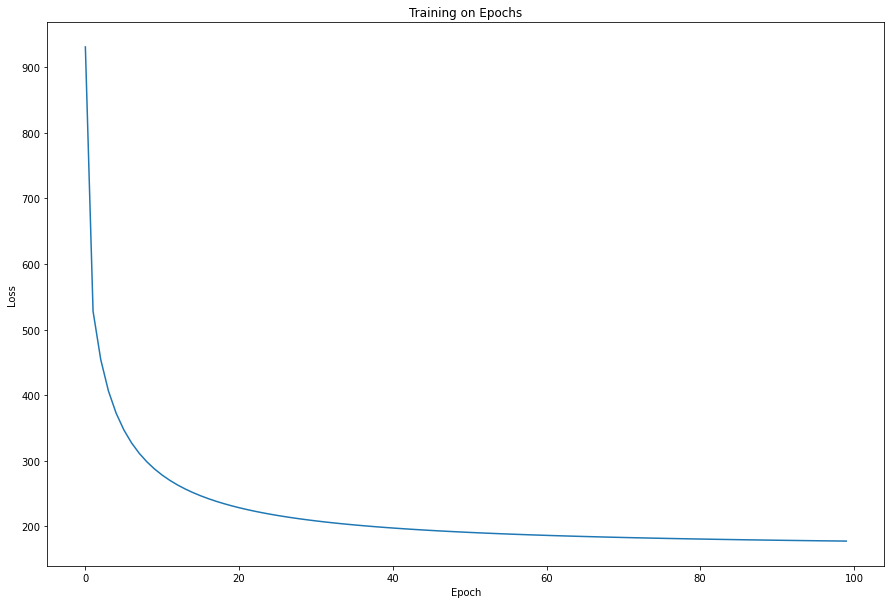

In [241]:
#code here
# part a
from sklearn.metrics import accuracy_score
logisticRegression = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = logisticRegression.train(X_train, y_train)
accuracy = accuracy_score(y_test, logisticRegression.predict(X_test))
fig = plt.figure(figsize = (15,10))
ax = sns.lineplot( x=range(100), y= np.asarray(loss).reshape(100,).astype(float))
plt.title("Training on Epochs")
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
plt.show()


In [263]:
train_s = np.random.randint(0,100,20)
alphas = np.random.rand(20)
eta = np.random.rand(20)/1000
loss_list = []
pred_list = []
for i in range(20):
    logisticRegression = LogisticRegression(alphas[i],ts[i],eta[i])
    losses = logisticRegression.train(X_train, y_train)
    loss = logisticRegression.calculate_loss(X_val, y_val)
    y_pred_new = logisticRegression.predict(X_val)
    loss_list.append(loss)
    pred_list.append(y_pred_new)
best_t = train_s[np.argmin(loss_list)]
best_alpha = alphas[np.argmin(loss_list)]
best_eta = eta[np.argmin(loss_list)]
lr = LogisticRegression(best_alpha,best_t,best_eta)
loss = lr.train(X_train, y_train)
acc = accuracy_score(y_test, lr.predict(X_test))
print ("Scenario 1 Accuracy = ", accuracy)
print ("Scenario 2 Accuracy = ", acc)
print ("Best t = ", best_t)
print ("Best alpha = ", best_alpha)
print ("Best eta = ", best_eta)

Scenario 1 Accuracy =  0.9779179810725552
Scenario 2 Accuracy =  0.9810725552050473
Best t =  69
Best alpha =  0.03756505250392839
Best eta =  0.0009364681001409744


**2.7 Feature Importance**

Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'meanfreq'),
  Text(1, 0, 'sd'),
  Text(2, 0, 'Q75'),
  Text(3, 0, 'IQR'),
  Text(4, 0, 'skew'),
  Text(5, 0, 'sp.ent'),
  Text(6, 0, 'sfm'),
  Text(7, 0, 'mode'),
  Text(8, 0, 'meanfun'),
  Text(9, 0, 'minfun'),
  Text(10, 0, 'maxfun'),
  Text(11, 0, 'meandom'),
  Text(12, 0, 'mindom'),
  Text(13, 0, 'maxdom'),
  Text(14, 0, 'modindx'),
  Text(15, 0, 'bias')])

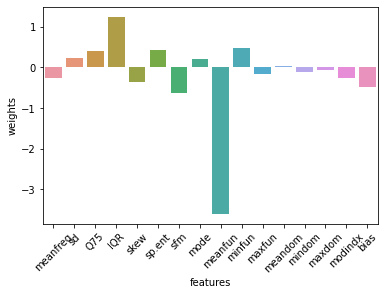

In [246]:
#code here

lrw = []
for i in lr.w:
    lrw.append(i[0])
    
df = pd.DataFrame({'features': lst, 'weights':lrw})
ax = sns.barplot(x = 'features', y = 'weights',data = df)
plt.xticks(rotation=45)


# **Part 3: Support Vector Machines - with the same Dataset**

**3.1 Dual SVM**

A) Train a dual SVM (with default parameters) for both kernel=“linear” and kernel=“rbf”) on the Voice Recognition training data.

B) Make predictions and report the accuracy on the training, validation, and test sets. Which kernel gave better accuracy on test dataset and why do you think that was better?

C) Please report the support vectors in both the cases and what do you observe? Explain


In [253]:
#code here
#linear kernel
linear = SVC(C=1, kernel = "linear")
linear.fit(X_train,y_train)
print ("Linear Kernel:")
print ("Accuracy - Training = ",accuracy_score(linear.predict(X_train),y_train))
print ("Accuracy - Validation = ",accuracy_score(linear.predict(X_val),y_val))
print ("Accuracy - Testing = ",accuracy_score(linear.predict(X_test),y_test))

#rbf kernel
rbf = SVC(C=1, kernel = "rbf")
rbf.fit(X_train,y_train)
print("Accuracy - Training = ",accuracy_score(rbf.predict(X_train),y_train))
print("Accuracy - Validation = ",accuracy_score(rbf.predict(X_val),y_val))
print("Accuracy - Testing = ",accuracy_score(rbf.predict(X_test),y_test))
print("Support Vectors - Linear Kernel: ", linear.support_vectors_.shape[0])
print("Support Vectors - rbf Kernel: ", rbf.support_vectors_.shape[0])

Linear Kernel:
Accuracy - Training =  0.9802664035520473
Accuracy - Validation =  0.9566074950690335
Accuracy - Testing =  0.9763406940063092
Accuracy - Training =  0.9861864824864331
Accuracy - Validation =  0.9763313609467456
Accuracy - Testing =  0.9810725552050473
Support Vectors - Linear Kernel:  157
Support Vectors - rbf Kernel:  287


/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### The rbf kernel gives a better testing accuracy than the linear kernel. 

**3.2 Using Kernel “rbf”, tune the hyperparameter “C” using the Grid Search & k-fold cross validation. You may take k=5 and assume values in grid between 1 to 100 with interval range of your choice.**

In [252]:
#code here

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid = {"kernel":['rbf'],"C":np.logspace(-10,10,100)},return_train_score=True)
pipe = make_pipeline(grid)
pipe.fit(X_train,y_train)

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/aayush/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e...
       2.25701972e+05, 3.59381366e+05, 5.72236766e+05, 9.11162756e+05,
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                                          'kernel': ['rbf']},
                              return_train_score=True))])

### The rbf kernel has more number of support vectors than the linear kernel.